In [1]:
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
os.chdir('/content/drive/My Drive/Bertexperiment')
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [2]:
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
!pip install datasets
import datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00


In [3]:
df= tfds.load('huggingface:ag_news')

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/ag_news/0.0.0.incompleteZSHX4U/ag_news-train.tfrecord*...:   0%|          …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/ag_news/0.0.0.incompleteZSHX4U/ag_news-test.tfrecord*...:   0%|          |…

Dataset ag_news downloaded and prepared to /root/tensorflow_datasets/ag_news/0.0.0. Subsequent calls will reuse this data.


In [ ]:
#import tensorflow_datasets as tfds
#import pandas as pd

# Load the AG News dataset
#dataset = tfds.load('huggingface:ag_news')

# Extract text and labels into separate lists
#texts = [example['text'].numpy().decode('utf-8') for example in dataset['train']]
#labels = [example['label'].numpy() for example in dataset['train']]

# Create a Pandas DataFrame
#df = pd.DataFrame({'text': texts, 'label': labels})

# Now you can use describe() on the DataFrame
#description = df.describe()
#print(description)


In [4]:
import tensorflow_datasets as tfds
import pandas as pd

# Load the AG News dataset with both train and test splits
(train_dataset, test_dataset), info = tfds.load('huggingface:ag_news', split=('train', 'test'), with_info=True)

# Extract text and labels into separate lists for both train and test splits
train_texts = [example['text'].numpy().decode('utf-8') for example in train_dataset]
train_labels = [example['label'].numpy() for example in train_dataset]

test_texts = [example['text'].numpy().decode('utf-8') for example in test_dataset]
test_labels = [example['label'].numpy() for example in test_dataset]

# Create Pandas DataFrames for train and test splits
train_df = pd.DataFrame({'text': train_texts, 'label': train_labels})
test_df = pd.DataFrame({'text': test_texts, 'label': test_labels})

# Now you have train_df and test_df DataFrames
print("Training data description:")
print(train_df.describe())

print("\nTesting data description:")
print(test_df.describe())


Training data description:
               label
count  120000.000000
mean        1.500000
std         1.118039
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000

Testing data description:
             label
count  7600.000000
mean      1.500000
std       1.118108
min       0.000000
25%       0.750000
50%       1.500000
75%       2.250000
max       3.000000


In [5]:
# Concatenate train and test DataFrames
ag_df = pd.concat([train_df, test_df], ignore_index=True)

# Define the file path for the combined CSV file
combined_csv_path = "ag_df.csv"

# Save the combined DataFrame as a CSV file
ag_df.to_csv(combined_csv_path, index=False)

print("Combined CSV file saved successfully.")
ag_df.head()
ag_df.tail()

Combined CSV file saved successfully.


text  label
127595  Terror is below radar in Russia It took 2 days...      0
127596  Air Canada confirms order for 45 Embraer jets ...      2
127597  White House Shifts Its Focus on Climate The ad...      3
127598  Netflix stock plummets on buzz about Amazon.co...      2
127599  Phillies to interview Russell for vacant manag...      1

In [7]:
ag_df.tail(20)

text  label
127580  Oil Price Spike Had Chilling Effect -Fed The r...      2
127581  Shareholders Toast Brewers' Merger  BRUSSELS/S...      2
127582  Rate hikes by Fed dull ARMs #39; luster 30-yea...      2
127583  IBM and Intel to open up blade specifications ...      3
127584  Spitzer launches music industry probe Eliot Sp...      2
127585  Five Blasts Reported in Spain After ETA Threat...      0
127586  Impact of euro played down The damage to expor...      2
127587  D #39;Urso suspended by FA The Football Associ...      1
127588  Stephen Dodd leads Volvo China Open Stephen Do...      1
127589  Is King Kahn #39;s reign coming to an end? He ...      1
127590  General Assembly committee opens two-day debat...      3
127591  US welcomes speech by Taiwan president WASHING...      0
127592  Fans put in position of deciding which team co...      1
127593  Twists give Game 3 added weight NEW YORK -- Th...      1
127594  U.S. Stocks Gain as Oil Retreats  NEW YORK (Re...      2
127595  Terror is below radar in Russia It took 2 days...      0
127596  Air Canada confirms order for 45 Embraer jets ...      2
127597  White House Shifts Its Focus on Climate The ad...      3
127598  Netflix stock plummets on buzz about Amazon.co...      2
127599  Phillies to interview Russell for vacant manag...      1

In [8]:
unique_values = ag_df['label'].unique()
print(unique_values)

[3 1 2 0]


In [9]:
ag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127600 entries, 0 to 127599
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    127600 non-null  object
 1   label   127600 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [10]:
# # Install necessary packages
!pip install transformers nltk datasets numpy seaborn pandas scikit-learn matplotlib

In [11]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# To import the Transformer Models
from transformers import AutoTokenizer, DataCollatorWithPadding
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

# to convert to Dataset datatype - the transformers library does not work well with pandas
from datasets import Dataset

In [12]:
ag_df.isnull().sum().sort_values(ascending=False)

text     0
label    0
dtype: int64

In [13]:
ag_df.head(17)

text  label
0   AMD Debuts Dual-Core Opteron Processor AMD #39...      3
1   Wood's Suspension Upheld (Reuters) Reuters - M...      1
2   Bush reform may have blue states seeing red Pr...      2
3   'Halt science decline in schools' Britain will...      3
4   Gerrard leaves practice London, England (Sport...      1
5   Sony Banking on MGM Deal to Boost Profits TOKY...      0
6   Giant pandas in China reserve get Wi-Fi Giant ...      3
7   Low turnout for Lithuania #39;s elections VILN...      0
8   Witness says CIA oversaw abuse at Abu Ghraib W...      0
9   Dan Olsen leads PGA qualifying school Dan Olse...      1
10  Militants claim US official slowed UN hostage ...      0
11  Update: Four Infineon executives jailed for DR...      3
12  Yahoo Extends Microsoft Ad Deal Yahoo Inc. has...      3
13  WHO Launches Polio Immunization In 23 African ...      0
14  Diageo transfers shares to cut E1.1bn deficit ...      2
15  Henry scores two as Arsenal crushes Charlton 4...      1
16  Implanted Lens Sharpens Blurred Vision WASHING...      0

In [14]:
ag_df.shape

(127600, 2)

In [15]:
import re

def remove_punctuations_and_spaces(text):
   # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[,.?;:\'(){}!|0-9]', '', text)

    def remove_percentage_and_hash(text):
        # Remove '%' and '#'
        text = text.replace('%', '')
        text = text.replace('#', '')
        return text

    # Apply the function to remove '%' and '#' characters
    text = remove_percentage_and_hash(text)

    # Remove extra whitespaces
    text = ' '.join(text.split())  # This will replace multiple spaces with a single space

    return text

# Apply the function to the 'text' column
ag_df['text'] = ag_df['text'].apply(remove_punctuations_and_spaces)

# Check the first few rows to verify the changes
ag_df.head()




text  label
0  amd debuts dual-core opteron processor amd s n...      3
1  woods suspension upheld reuters reuters - majo...      1
2  bush reform may have blue states seeing red pr...      2
3  halt science decline in schools britain will r...      3
4  gerrard leaves practice london england sports ...      1

In [16]:
ag_df['text']=ag_df['text'].str.lower()

In [17]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup

def remove_html_tags(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Apply the function to the 'Descriptions' column
ag_df['text'] = ag_df['text'].apply(remove_html_tags)

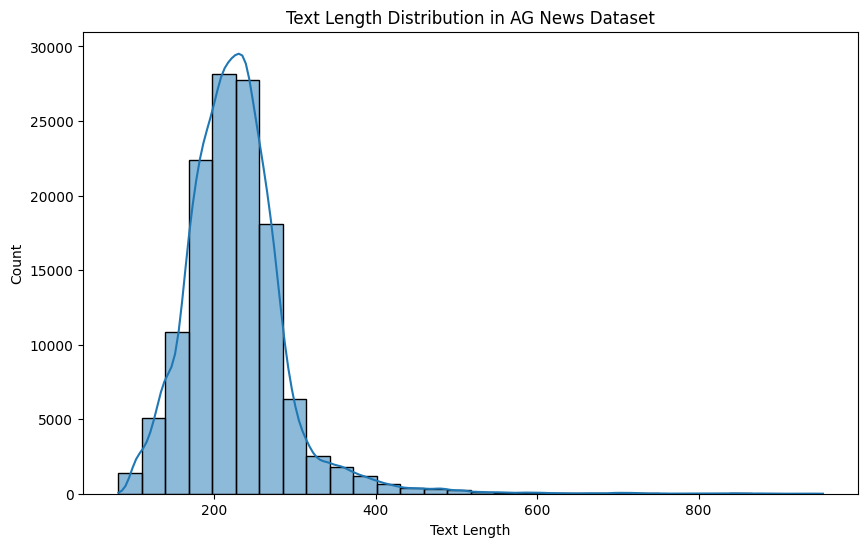

In [18]:
# Text length distribution plot
plt.figure(figsize=(10, 6))
ag_df['text_length'] = ag_df['text'].apply(len)
sns.histplot(ag_df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution in AG News Dataset')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

In [19]:

import nltk

# downloading corpus only would work
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [20]:
from nltk.corpus import stopwords

# english stopwords
stopw=stopwords.words('english')
stopw[:15]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

In [21]:
import re
from nltk.corpus import stopwords

# English stopwords
stopw = stopwords.words('english')

# Function to remove stopwords
def remove_stopwords(text):
    clean_text = [word for word in text.split() if word.lower() not in stopw]
    return ' '.join(clean_text)

# Apply the function to the 'Descriptions' column
ag_df['text'] = ag_df['text'].apply(remove_stopwords)

# Check the first few rows to verify the changes
ag_df.head()

text  label  text_length
0  amd debuts dual-core opteron processor amd new...      3          187
1  woods suspension upheld reuters reuters - majo...      1          215
2  bush reform may blue states seeing red preside...      2          258
3  halt science decline schools britain run leadi...      3          142
4  gerrard leaves practice london england sports ...      1          226

In [22]:
ag_df.to_csv('ag1-df.csv', index=False)

In [23]:
ag1_df=pd.read_csv('ag1-df.csv')

In [24]:
obj_cols = ag1_df.select_dtypes(include=['object','float64'])
print(obj_cols)

                                                     text
0       amd debuts dual-core opteron processor amd new...
1       woods suspension upheld reuters reuters - majo...
2       bush reform may blue states seeing red preside...
3       halt science decline schools britain run leadi...
4       gerrard leaves practice london england sports ...
...                                                   ...
127595  terror radar russia took days russia security ...
127596  air canada confirms order embraer jets montrea...
127597  white house shifts focus climate administratio...
127598  netflix stock plummets buzz amazoncom competit...
127599  phillies interview russell vacant manager job ...

[127600 rows x 1 columns]


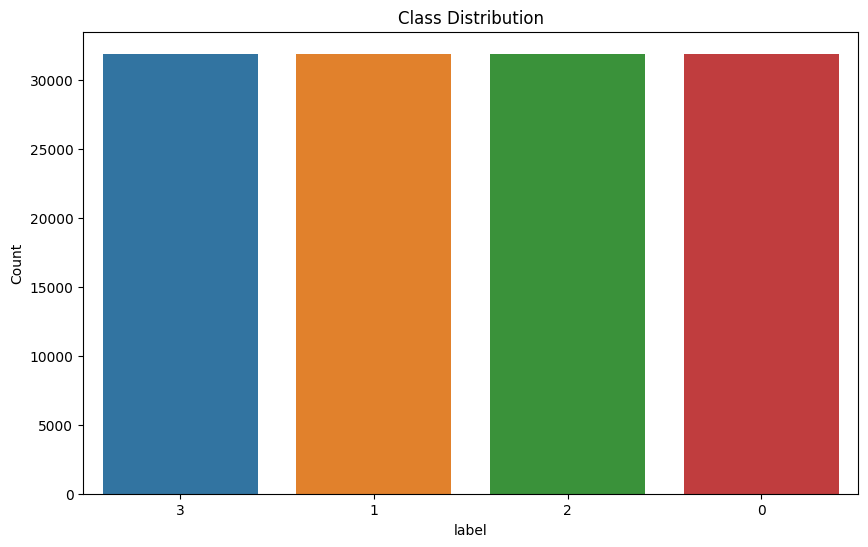

Class Distribution:
3    31900
1    31900
2    31900
0    31900
Name: label, dtype: int64


In [25]:
# Check class distribution
class_distribution =ag1_df['label'].value_counts()

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=ag1_df, x='label', order=class_distribution.index)
plt.title('Class Distribution')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

# Display class distribution information
print("Class Distribution:")
print(class_distribution)


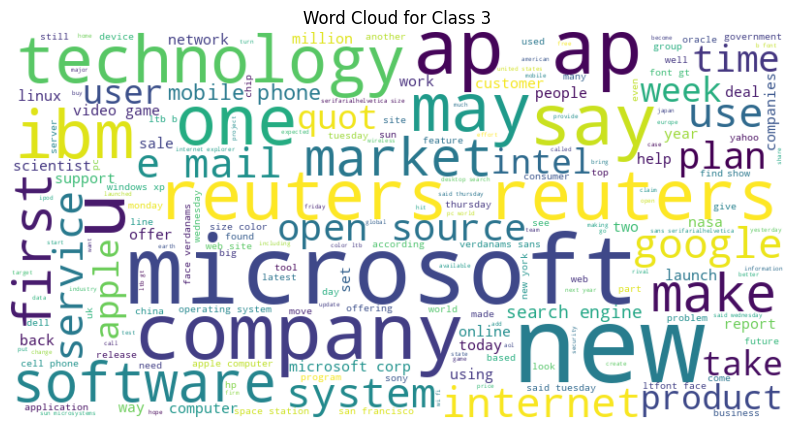

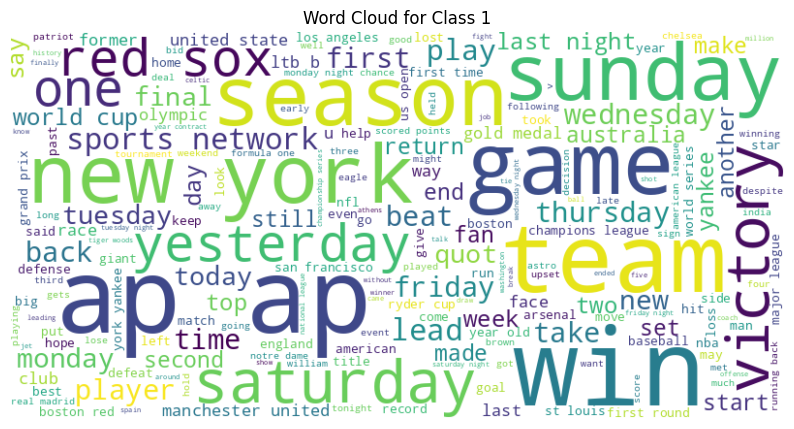

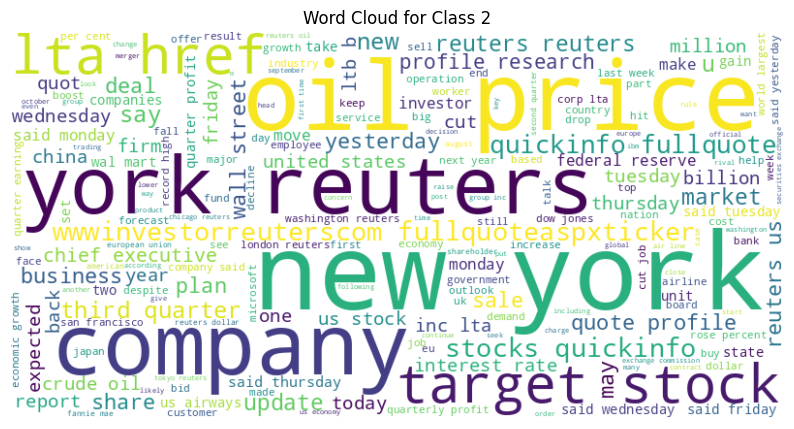

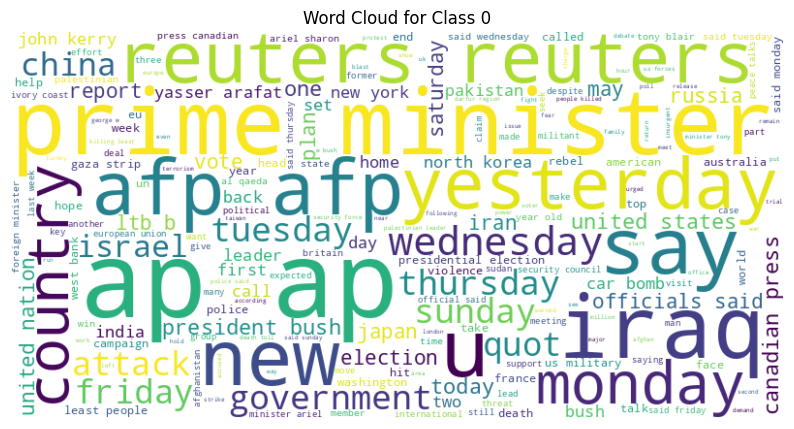

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for a specific class
def generate_word_cloud(class_index):
    class_text = ' '.join(ag1_df[ag1_df['label'] == class_index]['text'])

    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(class_text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Word Cloud for Class {class_index}')
    plt.show()

# Generate word clouds for each class
for class_index in ag1_df['label'].unique():
    generate_word_cloud(class_index)


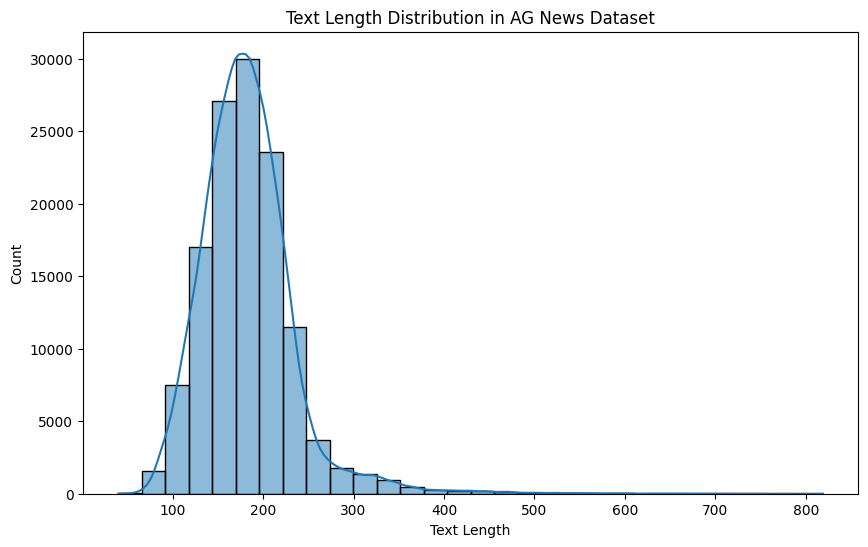

In [27]:
# Text length distribution plot
plt.figure(figsize=(10, 6))
ag1_df['text_length'] = ag1_df['text'].apply(len)
sns.histplot(ag1_df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution in AG News Dataset')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()


In [ ]:
# Load the BBC dataset
bbc_df = pd.read_csv('/content/drive/My Drive/Bertexperiment/BBC_News_1(M).csv')
bbc_df.head()

Unnamed: 0                                        Description  Class Index
0         NaN  worldcom ex-boss launches defence lawyers defe...            2
1         NaN  german 2 confidence slides german 2 confidence...            2
2         NaN  bbc poll indicates economic gloom citizens in ...            2
3         NaN  lifestyle  governs mobile choice  faster  bett...            3
4         NaN  enron bosses in $168m payout eighteen former e...            2

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the BBC dataset
bbc_df = pd.read_csv('/content/drive/My Drive/Bertexperiment/BBC_News_1(M).csv')

# Rename columns if needed
bbc_df = bbc_df.rename(columns={"Description": "text", "Class Index": "label"})

# Remove the "Unnamed: 0" column
bbc_df = bbc_df.drop(columns=["Unnamed: 0"])

# Display the first few rows of the DataFrame
print(bbc_df.head())




                                                text  label
0  worldcom ex-boss launches defence lawyers defe...      2
1  german 2 confidence slides german 2 confidence...      2
2  bbc poll indicates economic gloom citizens in ...      2
3  lifestyle  governs mobile choice  faster  bett...      3
4  enron bosses in $168m payout eighteen former e...      2


In [ ]:
# Check class distribution before any modifications
bbc_class_counts = bbc_df['label'].value_counts()
print("Class distribution before dropping label 4:")
print(bbc_class_counts)

# Drop rows where label is 4
bbc_df = bbc_df[bbc_df['label'] != 4]

# Check class distribution after dropping label 4
bbc_class_counts_after = bbc_df['label'].value_counts()
print("\nClass distribution after dropping label 4:")
print(bbc_class_counts_after)

# Get unique labels
unique_labels = bbc_df['label'].unique()
print("\nUnique labels after dropping label 4:")
print(unique_labels)

# Get total number of BBC news articles
total_count = bbc_df.shape[0]
print("\nTotal number of BBC news articles after dropping label 4:", total_count)



Class distribution before dropping label 4:
1    346
2    336
0    274
4    273
3    261
Name: label, dtype: int64

Class distribution after dropping label 4:
1    346
2    336
0    274
3    261
Name: label, dtype: int64

Unique labels after dropping label 4:
[2 3 0 1]

Total number of BBC news articles after dropping label 4: 1217


In [ ]:
total_count = bbc_df.shape[0]
print("Total number of BBC news articles:", total_count)

Total number of BBC news articles: 1217


In [ ]:
# Assuming bbc_df is your DataFrame
#bbc_df = bbc_df[bbc_df['label'] != 4]

# Verify the result
#bbc_class_counts = bbc_df['label'].value_counts()
#print(bbc_class_counts)

# Print unique values after dropping label 4
#unique_labels = bbc_df['label'].unique()
#print(unique_labels)

In [ ]:
obj_cols = bbc_df.select_dtypes(include=['object','float64'])
print(obj_cols)

                                                   text
0     worldcom ex-boss launches defence lawyers defe...
1     german 2 confidence slides german 2 confidence...
2     bbc poll indicates economic gloom citizens in ...
3     lifestyle  governs mobile choice  faster  bett...
4     enron bosses in $168m payout eighteen former e...
...                                                 ...
1482  file-swappers ready new network legal attacks ...
1484  hyundai to build new india plant south korea s...
1487  weak dollar hits reuters revenues at media gro...
1488  apple ipod family expands market apple has exp...
1489  santy worm makes unwelcome visit thousands of ...

[1217 rows x 1 columns]


In [ ]:
bbc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217 entries, 0 to 1489
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1217 non-null   object
 1   label   1217 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 28.5+ KB


In [ ]:
bbc_df.isnull().sum().sort_values(ascending=False)

text     0
label    0
dtype: int64

In [ ]:
bbc_df.shape

(1217, 2)

In [ ]:
import re

def remove_punctuations_and_spaces(text):
    # Remove punctuation
    text = re.sub(r'[,.?;:\'(){}!|0-9]', '', text)

    def remove_percentage_and_hash(text):
        # Remove '%' and '#'
        text = text.replace('%', '')
        text = text.replace('#', '')
        return text

    # Apply the function to remove '%' and '#' characters
    text = remove_percentage_and_hash(text)

    # Remove extra whitespaces
    text = ' '.join(text.split())  # This will replace multiple spaces with a single space

    return text

# Apply the function to the 'text' column
bbc_df['text'] = bbc_df['text'].apply(remove_punctuations_and_spaces)

# Check the first few rows to verify the changes
bbc_df.head()

text  label
0  worldcom ex-boss launches defence lawyers defe...      2
1  german confidence slides german confidence fel...      2
2  bbc poll indicates economic gloom citizens in ...      2
3  lifestyle governs mobile choice faster better ...      3
4  enron bosses in $m payout eighteen former enro...      2

In [ ]:
bbc_df['text']=bbc_df['text'].str.lower()

In [ ]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup

def remove_html_tags(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Apply the function to the 'Descriptions' column
bbc_df['text'] = bbc_df['text'].apply(remove_html_tags)

In [ ]:

import nltk

# downloading corpus only would work
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package bcp47 to /root/nltk_data...
       |   Package bcp47 is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Packag


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
from nltk.corpus import stopwords

# english stopwords
stopw=stopwords.words('english')
stopw[:15]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

In [ ]:
import re
from nltk.corpus import stopwords

# English stopwords
stopw = stopwords.words('english')

# Function to remove stopwords
def remove_stopwords(text):
    clean_text = [word for word in text.split() if word.lower() not in stopw]
    return ' '.join(clean_text)

# Apply the function to the 'Descriptions' column
bbc_df['text'] = bbc_df['text'].apply(remove_stopwords)

# Check the first few rows to verify the changes
bbc_df.head()

text  label
0  worldcom ex-boss launches defence lawyers defe...      2
1  german confidence slides german confidence fel...      2
2  bbc poll indicates economic gloom citizens maj...      2
3  lifestyle governs mobile choice faster better ...      3
4  enron bosses $m payout eighteen former enron d...      2

In [ ]:

bbc_df.to_csv('bbc2-df.csv', index=False)

In [ ]:
bbc1_df = pd.read_csv('bbc2-df.csv')
bbc1_df.head()

text  label
0  worldcom ex-boss launches defence lawyers defe...      2
1  german confidence slides german confidence fel...      2
2  bbc poll indicates economic gloom citizens maj...      2
3  lifestyle governs mobile choice faster better ...      3
4  enron bosses $m payout eighteen former enron d...      2

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from wordcloud import WordCloud

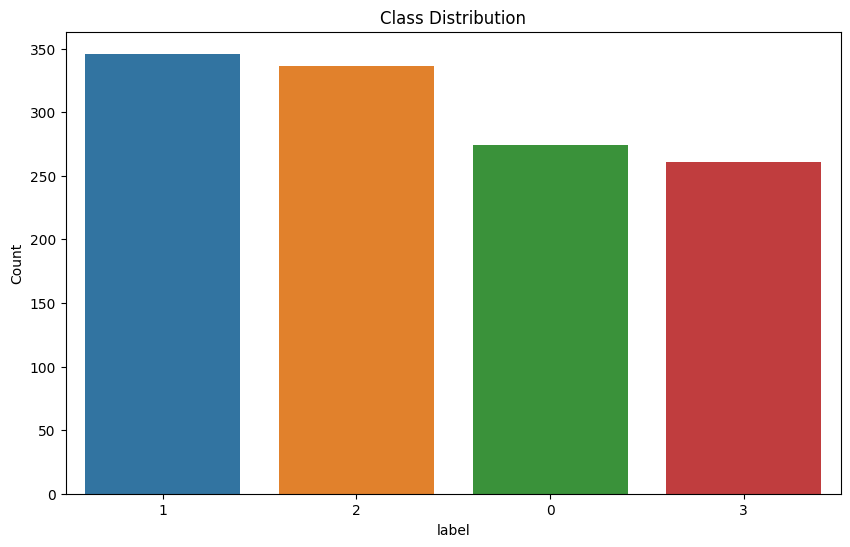

Class Distribution:
1    346
2    336
0    274
3    261
Name: label, dtype: int64


In [ ]:
# Check class distribution
class_distribution = bbc1_df['label'].value_counts()
import matplotlib.pyplot as plt

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=bbc1_df, x='label', order=class_distribution.index)
plt.title('Class Distribution')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

# Display class distribution information
print("Class Distribution:")
print(class_distribution)


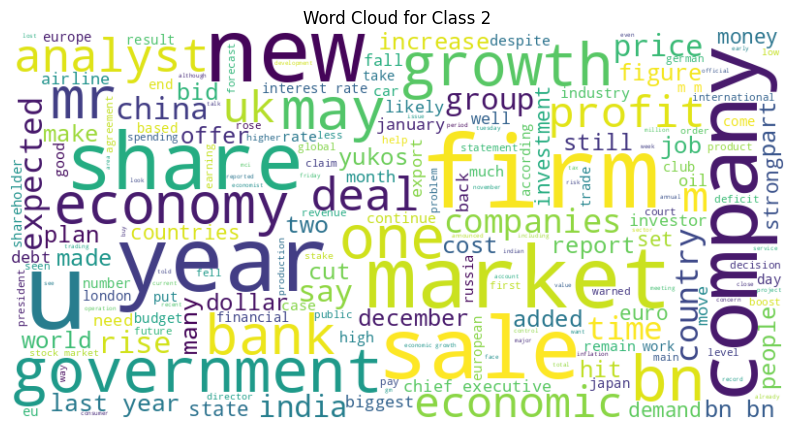

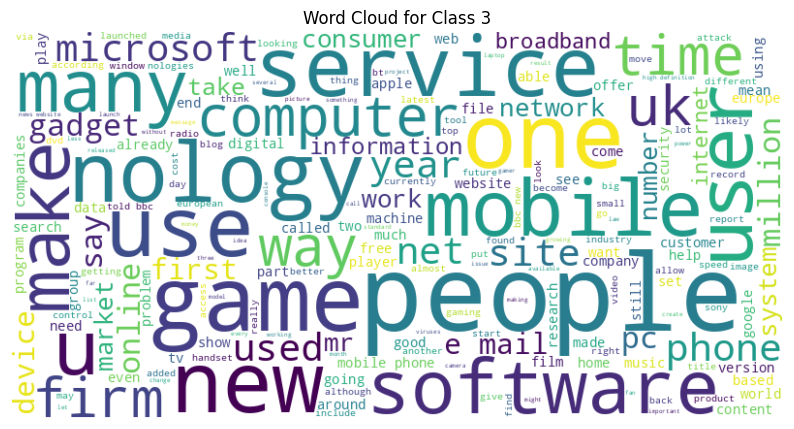

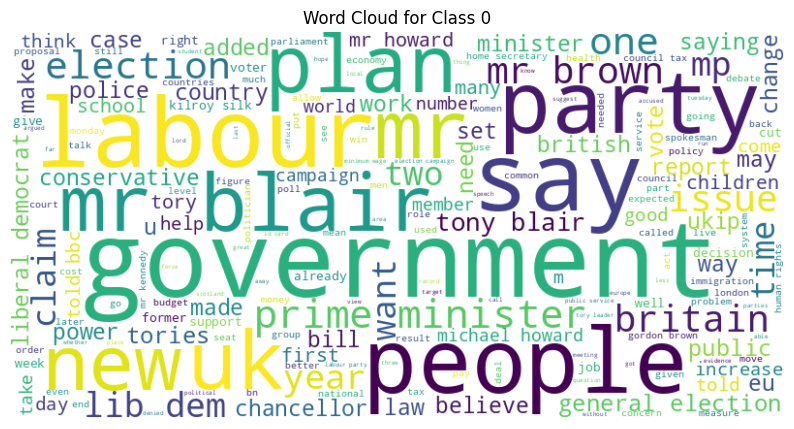

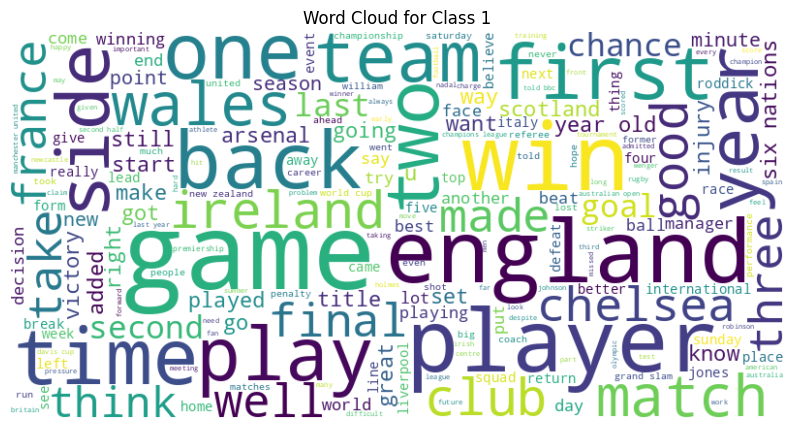

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for a specific class
def generate_word_cloud(class_index, word_to_remove='said'):
    # Combine all text for the specific class
    class_text = ' '.join(bbc1_df[bbc1_df['label'] == class_index]['text'])

    # Remove the specified word from the text
    class_text_without_word = class_text.replace(word_to_remove, '')

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(class_text_without_word)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Word Cloud for Class {class_index}')
    plt.show()

# Generate word clouds for each class (excluding the word "said")
for class_index in bbc1_df['label'].unique():
    generate_word_cloud(class_index)



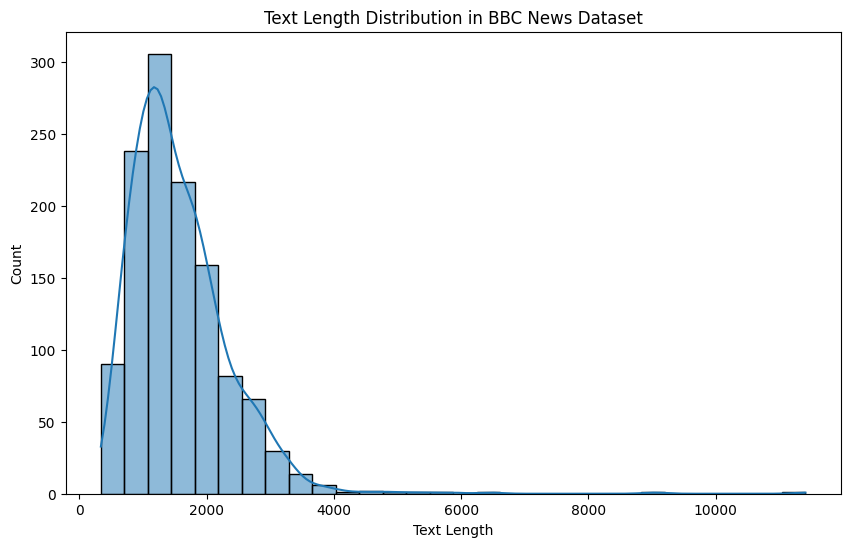

In [ ]:
# Text length distribution plot
plt.figure(figsize=(10, 6))
bbc1_df['text_length'] = bbc1_df['text'].apply(len)
sns.histplot(bbc1_df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution in BBC News Dataset')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

In [ ]:
combined_df = pd.concat([ag1_df, bbc1_df], axis=0, ignore_index=True)

In [ ]:
combined_df.head(50)

text  label  text_length
0   amd debuts dual-core opteron processor amd new...      3          174
1   woods suspension upheld reuters reuters - majo...      1          191
2   bush reform may blue states seeing red preside...      2          222
3   halt science decline schools britain run leadi...      3          124
4   gerrard leaves practice london england sports ...      1          185
5   sony banking mgm deal boost profits tokyo - so...      0          126
6   giant pandas china reserve get wi-fi giant pan...      3          197
7   low turnout lithuania elections vilnius lithua...      0          207
8   witness says cia oversaw abuse abu ghraib witn...      0          201
9   dan olsen leads pga qualifying school dan olse...      1          151
10  militants claim us official slowed un hostage ...      0          243
11  update four infineon executives jailed dram pr...      3          235
12  yahoo extends microsoft ad deal yahoo inc agre...      3          163
13  launches polio immunization african countries ...      0          155
14  diageo transfers shares cut ebn deficit ipecom...      2          185
15  henry scores two arsenal crushes charlton - lo...      1          194
16  implanted lens sharpens blurred vision washing...      0          229
17  playboy google interview google playboy interv...      3          230
18  last xmas order date antipodes &ltstrong&gtcas...      3           78
19  utah urban meyer named football coach florida ...      1          211
20  notre dame struggling start fighting irish ope...      1          137
21  german workers feel chill general motors job c...      2          166
22  ibm pension settlement talks new yorkibm said ...      2          147
23  oswalt set ending astros hex wire services roy...      1          147
24  grokster sony bmg develop legit pp service son...      3          200
25  blues ahl team move peoria ap ap - worcester i...      1          119
26  infineon build production plant malaysia gtifx...      2          167
27  murdoch acts block rival takeover bid rupert m...      2          200
28  joyous pilgrims mark end najaf standoff thousa...      0          170
29  soccer portugal title hopes end volos greece l...      1          154
30  parties file suits election issues ap ap - new...      0          150
31  anti-doping agency boosted ban sprinter balco ...      1          177
32  company claims first true wimax chip wireless ...      3           96
33  target digital tv switch uks switch digital te...      2          102
34  sudan says darfur self-rule questions rebel ta...      0          202
35  federer ends brilliant year masters title hous...      1          220
36  govt gives najaf militants final call najaf ir...      0          321
37  appeals court revives oracle shareholder case ...      3          366
38  family devastated woman soldier iraq death bro...      0          146
39  enter e-mail word web google may thinking rele...      3          125
40  funds population goals urged london -- wealthy...      0          203
41  microsoft extends legal protection users bid d...      3          148
42  fuel rods turned weapons north claims north ko...      0          225
43  liberty likely bhutto pakistani court granted ...      0          129
44  supreme court hears file sharing case us supre...      3          143
45  early elvis tapes go auction elvis presleys ea...      0          106
46  stock futures rise gdp data new york reuters -...      2          191
47  cincinnati qb expects start bowl ap ap - cinci...      1          157
48  atlanta gives la reasons worry los angeles - a...      1          148
49  us-russian space crew make soft landing dark s...      3          196

In [ ]:
combined_df['label'].value_counts()

1    32246
2    32236
0    32174
3    32161
Name: label, dtype: int64

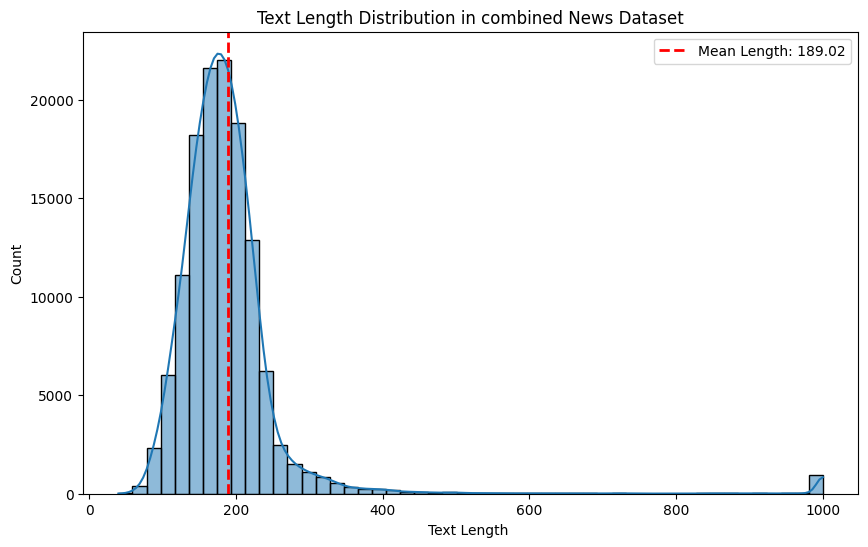

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_df is your DataFrame with the 'text' column
combined_df['text_length'] = combined_df['text'].apply(len)

# Truncate text length to 1000
combined_df['text_length'] = combined_df['text_length'].apply(lambda x: min(x, 1000))

# Text length distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['text_length'], bins=50, kde=True)
plt.title('Text Length Distribution in combined News Dataset')
plt.xlabel('Text Length ')
plt.ylabel('Count')

# Calculate and display the mean text length
mean_length = combined_df['text_length'].mean()
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=2, label=f'Mean Length: {mean_length:.2f}')

plt.legend()
plt.show()


Now Concatenate Both agnews and bbc news

In [ ]:
combined_df.to_csv('combinedwoextracleaning2.csv', index=False)

In [ ]:
from bs4 import BeautifulSoup

# Assuming 'text' is the column with text data
combined_df['text'] = combined_df['text'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())

# Check the first few rows to verify the changes
combined_df.head()

text  label  text_length
0  amd debuts dual-core opteron processor amd new...      3          174
1  woods suspension upheld reuters reuters - majo...      1          191
2  bush reform may blue states seeing red preside...      2          222
3  halt science decline schools britain run leadi...      3          124
4  gerrard leaves practice london england sports ...      1          185

In [ ]:
import re

def remove_punctuations_and_spaces(text):
    # Remove punctuation
    text = re.sub(r'[,.?;:\'(){}!|0-9]', '', text)

    def remove_percentage_and_hash(text):
        # Remove '%' and '#'
        text = text.replace('%', '')
        text = text.replace('#', '')
        return text

    # Apply the function to remove '%' and '#' characters
    text = remove_percentage_and_hash(text)

    # Remove extra whitespaces
    text = ' '.join(text.split())  # This will replace multiple spaces with a single space

    return text

# Apply the function to the 'text' column
combined_df['text'] = combined_df['text'].apply(remove_punctuations_and_spaces)

# Check the first few rows to verify the changes
combined_df.head()

text  label  text_length
0  amd debuts dual-core opteron processor amd new...      3          174
1  woods suspension upheld reuters reuters - majo...      1          191
2  bush reform may blue states seeing red preside...      2          222
3  halt science decline schools britain run leadi...      3          124
4  gerrard leaves practice london england sports ...      1          185

In [ ]:
import re

# Iterate over the rows in the DataFrame and clean the 'text' column
for index, row in combined_df.iterrows():
    text = row['text']

    # Remove all non-alphanumeric characters except spaces, hyphens, and dollar signs
    cleaned_text = re.sub(r'[^\w\s$-]', '', text)

    # Replace hyphens with spaces
    cleaned_text = cleaned_text.replace('-', ' ')

    # Remove dollar signs
    cleaned_text = cleaned_text.replace('$', '')

    combined_df.at[index, 'text'] = cleaned_text

# Display the first few rows of the cleaned DataFrame
print(combined_df.head())


                                                text  label  text_length
0  amd debuts dual core opteron processor amd new...      3          174
1  woods suspension upheld reuters reuters   majo...      1          191
2  bush reform may blue states seeing red preside...      2          222
3  halt science decline schools britain run leadi...      3          124
4  gerrard leaves practice london england sports ...      1          185


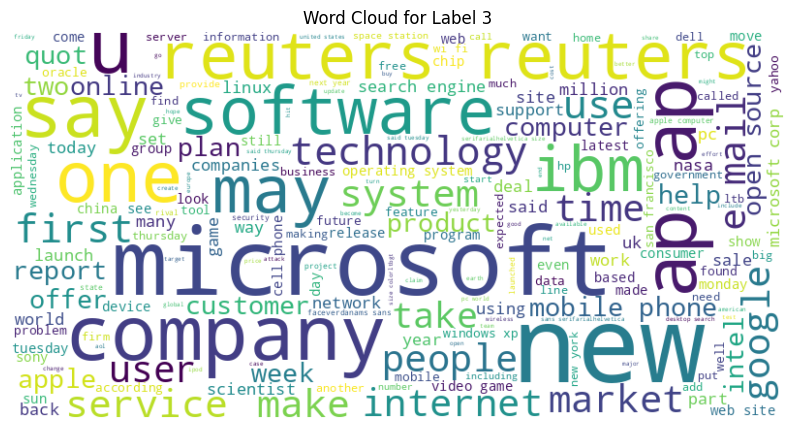

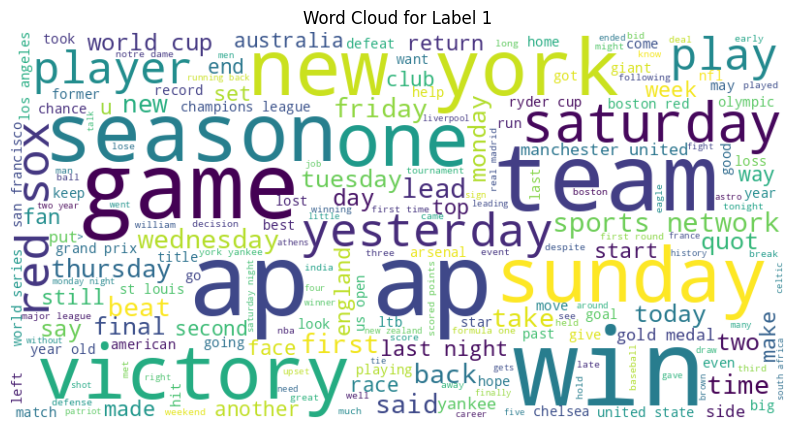

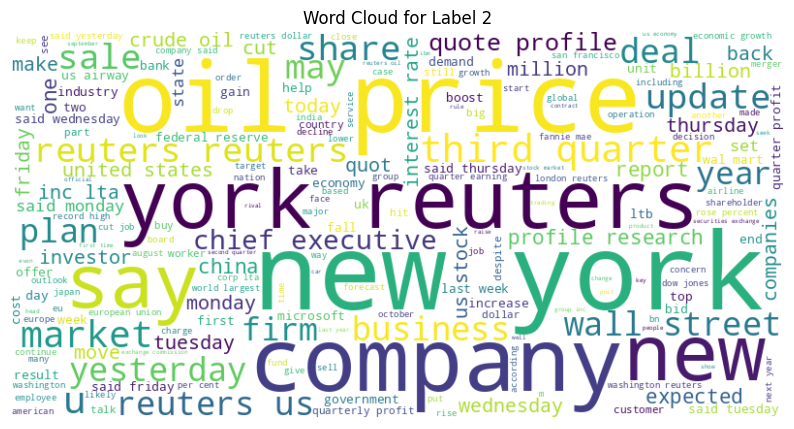

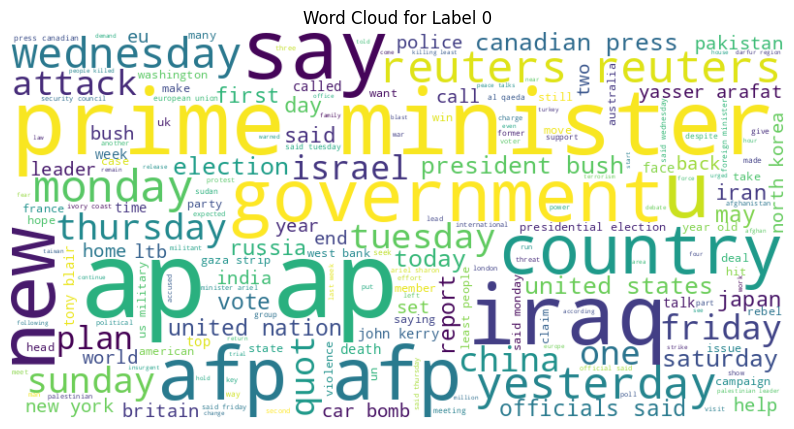

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for a specific class
def generate_word_cloud(class_index):
    class_text = ' '.join(combined_df[combined_df['label'] == class_index]['text'])

    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(class_text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Word Cloud for Label {class_index}')
    plt.show()

# Generate word clouds for each label
for class_index in combined_df['label'].unique():
    generate_word_cloud(class_index)



In [ ]:
# Replace 'ap' and 'afp' with an empty string in the 'text' column
combined_df['text'] = combined_df['text'].str.replace(r'\b(?:ap|afp)\b', '', regex=True)
combined_df['text'] = combined_df['text'].str.replace('ap ap', '', regex=False)
combined_df['text'] = combined_df['text'].str.replace('afp afp', '', regex=False)
# Replace double spaces with a single space in the 'text' column
combined_df['text'] = combined_df['text'].str.replace(r'\s+', ' ', regex=True)

# Display the DataFrame after removing double spaces
print(combined_df)

# Display the DataFrame after removing the specified words
print(combined_df)


                                                     text  label  text_length
0       amd debuts dual core opteron processor amd new...      3          174
1       woods suspension upheld reuters reuters major ...      1          188
2       bush reform may blue states seeing red preside...      2          222
3       halt science decline schools britain run leadi...      3          124
4       gerrard leaves practice london england sports ...      1          185
...                                                   ...    ...          ...
128812  file swappers ready new network legal attacks ...      3         1000
128813  hyundai build new india plant south korea hyun...      2          985
128814  weak dollar hits reuters revenues media group ...      2          909
128815  apple ipod family expands market apple expande...      3         1000
128816  santy worm makes unwelcome visit thousands web...      3         1000

[128817 rows x 3 columns]
                                     

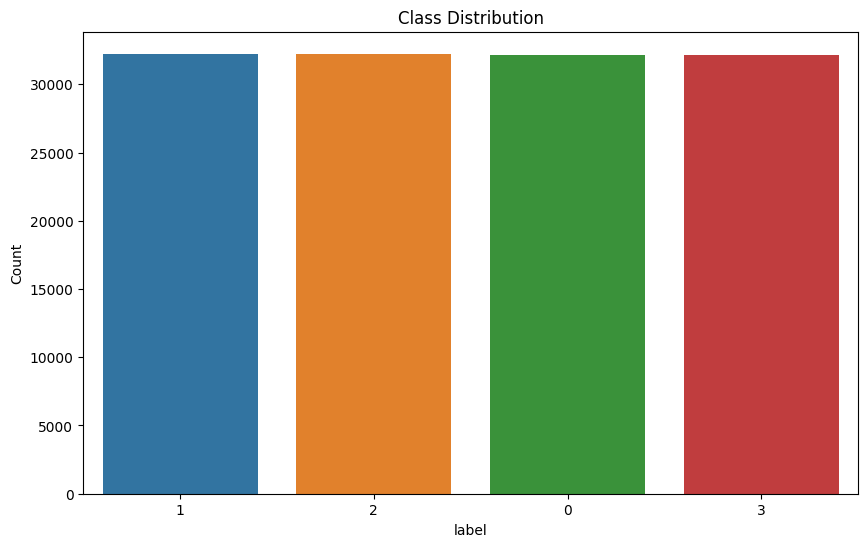

Class Distribution:
1    32246
2    32236
0    32174
3    32161
Name: label, dtype: int64


In [ ]:
# Check class distribution
class_distribution = combined_df['label'].value_counts()
import matplotlib.pyplot as plt

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='label', order=class_distribution.index)
plt.title('Class Distribution')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

# Display class distribution information
print("Class Distribution:")
print(class_distribution)


In [ ]:
combined_df.to_csv('combinedwithextracleaning3.csv', index=False)

In [ ]:
combined_df = pd.read_csv('combinedwithextracleaning3.csv')

In [ ]:
combined_df.head()

text  label  text_length
0  amd debuts dual core opteron processor amd new...      3          174
1  woods suspension upheld reuters reuters major ...      1          188
2  bush reform may blue states seeing red preside...      2          222
3  halt science decline schools britain run leadi...      3          124
4  gerrard leaves practice london england sports ...      1          185

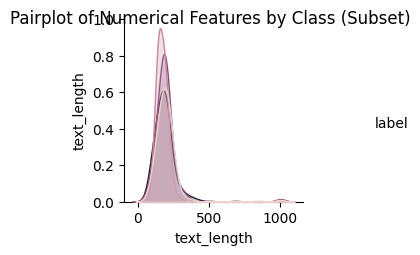

In [ ]:
import numpy as np

# Sample a subset of the data
subset_size = min(1000, len(combined_df))  # Adjust the subset size based on your preferences
subset_df = combined_df.sample(n=subset_size, random_state=42)

# Plot pairplot with the subset
sns.pairplot(subset_df, hue='label')
plt.suptitle('Pairplot of Numerical Features by Class (Subset)')
plt.show()

